In [12]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plot
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn import metrics
from sklearn.model_selection import train_test_split,KFold
from sklearn.svm import SVR
#from sklearn. import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler

In [2]:
train_df = pd.read_csv('/Users/Navaneethan/Documents/Machine_Learning/Kaggle/Elo/Data/train.csv')


In [3]:
test_df = pd.read_csv('/Users/Navaneethan/Documents/Machine_Learning/Kaggle/Elo/Data/test.csv')

In [4]:
train_df.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [5]:
train_df.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [6]:
train_df['target_new'] = 10**(train_df['target']*np.log10(2))

In [7]:
np.var(train_df['target'])

14.826276787293846

In [8]:
np.var(train_df['target_new'])

604578.3109343556

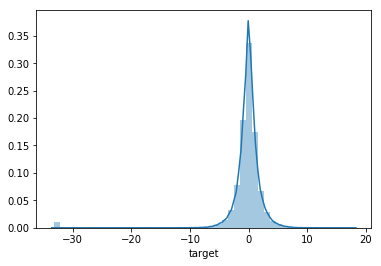

In [9]:
sns.distplot(train_df.target)

In [9]:
import sklearn
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

In [24]:
X = pd.DataFrame(train_df[['feature_1','feature_2','feature_3']])
y = pd.DataFrame(train_df['target_new'])

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=42)
model_rr = LinearRegression()
model_rr.fit(X_train, y_train)

Ridge_train_score = model_rr.score(X_train,y_train)
Ridge_test_score = model_rr.score(X_test, y_test)
Predict_test_ridge = model_rr.predict(X_test)

print("Ridge regression train score:", Ridge_train_score)
print("Ridge regression test score:", Ridge_test_score)
print('RSquare value(test):',np.round(model_rr.score(X_test, y_test)*100,2))
print('MSE for test data:',np.round(metrics.mean_squared_error(y_test, Predict_test_ridge),2))

Ridge regression train score: 5.705650209031354e-05
Ridge regression test score: -0.0009359552386183356
RSquare value(test): -0.09
MSE for test data: 64040.35


In [29]:
x = [[1,5,6]]
model_rr.predict(x)

array([[-2.16917836]])

In [27]:
import pickle
with open('/Users/Navaneethan/Documents/model.pkl', 'wb') as model_file:
  pickle.dump(model_rr, model_file,protocol=2)